# Fuel Consumption and Emission Ratings of all Cars in Canada with model year 2019
> We will use scikit-learn to implement different types of linear regression on our dataset. Then, we will split our data into training and testing sets, create a model using the training set, evaluate the model using a test set, and finally use the model to predict an unknown value.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [regression, modeling]

In this blog post, we will use scikit-learn to implement different types of linear regression on our dataset. Then, we will split our data into training and testing sets, create a model using the training set, evaluate the model using a test set, and finally use the model to predict an unknown value.
The dataset is related to the Fuel Consumption and Carbon Dioxide Emission of all cars for retail sale in Canada in the year 2019. You can download the dataset here: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

**Understanding the data:**  
**Model:** 4WD/4X4 = Four-wheel drive, AWD = All-wheel drive, FFV = Flexible-fuel vehicle, SWB = Short wheelbase, LWB = Long wheelbase, EWB = Extended wheelbase  
**Transmission:** A = automatic, AM = automated manual, AS = automatic with select shift, AV = continuously variable, M = manual, 3 – 10 = Number of gears  
**Fuel type:** X = regular gasoline, Z = premium gasoline, D = diesel, E = ethanol (E85), N = natural gas  
**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km); the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)  
**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving  
**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)  
**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

In [158]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

---
### Explore the data
Read the data into a pandas dataframe.

In [159]:
df = pd.read_csv('MY2019 Fuel Consumption Ratings.csv', skipfooter=30)
df.head()

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,3


In [160]:
# dimensions of the dataframe
df.shape

(1041, 15)

In [161]:
# summarize the data
df.describe()

,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,1041.0,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,2019.0,3.114121,5.603266,12.382901,9.041114,10.876657,27.633045,251.396734,4.557157,4.128722
std,0.0,1.316896,1.797741,3.301165,2.053922,2.702855,7.332346,57.134349,1.655076,1.789056
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,13.000000,96.000000,1.000000,1.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,22.000000,212.000000,3.000000,3.000000
50%,2019.0,3.000000,6.000000,12.100000,8.800000,10.600000,27.000000,248.000000,4.000000,5.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.600000,31.000000,290.000000,5.000000,5.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,69.000000,522.000000,10.000000,7.000000


Let's rename the columns for the sake of simplicity.

In [162]:
df.rename(columns={'Engine Size (L)':'Engine_Size', 'Fuel Consumption Comb (L/100 km)':'Fuel_Consumption', 'CO2 Emissions (g/km)':'CO2_Emissions'}, inplace=True)
df.head(2)

,Model Year,Make,Model,Vehicle Class,Engine_Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel_Consumption,Fuel Consumption Comb (mpg),CO2_Emissions,CO2 Rating,Smog Rating
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3


In [163]:
cdf = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions']]
cdf.head()

,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
0,2.4,4,8.6,199
1,3.5,6,10.8,252
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,3.5,6,11.0,261


We can plot each of these features to determine their frequency distribution.

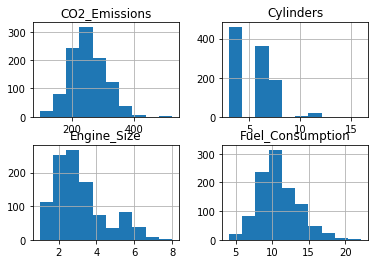

In [164]:
viz = cdf[['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions']]
viz.hist()
plt.show()

Now let's plot each of these features vs the CO2 Emissions to see how linear is their relationship.

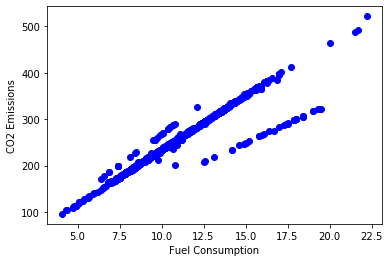

In [165]:
plt.scatter(cdf.Fuel_Consumption, cdf.CO2_Emissions, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

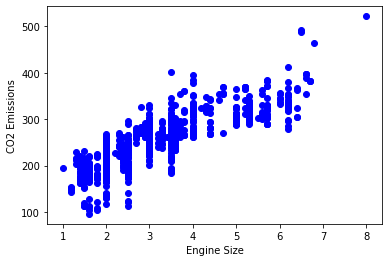

In [166]:
plt.scatter(cdf.Engine_Size, cdf.CO2_Emissions, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

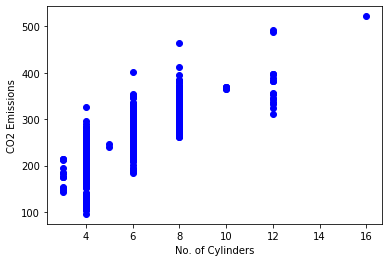

In [167]:
plt.scatter(cdf.Cylinders, cdf.CO2_Emissions, color='blue')
plt.xlabel('No. of Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

---
### Train/Test Split

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. You train with the training set and test with the testing set.

Let's split our dataset: 80% of the data for training, and the remaining 20% for testing. Create a mask to select random rows using the `np.random.rand()` function.

In [168]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

---
## Simple Linear Regression

### Modeling
Use the `sklearn` package to model the data.

In [169]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regr.fit(train_x, train_y)

# the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients:  [[36.13934429]]
Intercept [138.26102071]


The **coefficient** and **intercept** in simple linear regression are the only two parameters of the fit line. `sklearn` can estimate them directly from our data.

---
### Plot the outputs
Let's plot the fit line over the data.

Text(0, 0.5, 'CO2 Emissions')

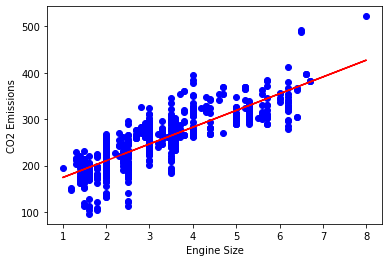

In [170]:
plt.scatter(train.Engine_Size, train.CO2_Emissions, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

---
### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide insight to areas that require improvement.

There are different model evaluation metrics. We'll use MSE to calcualte the accuracy of our model based on the test set.
- Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just the average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
- R-squared: It is not an error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [171]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

Mean absolute error: 23.94
Residual sum of squares (MSE): 955.46
R2-score: 0.57


---
## Multiple Linear Regression
In reality, there are multiple variables that predict CO2 emissions. When more than one independent variable is present, the process is called multiple linear regression.

### Modeling

In [172]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_Size', 'Cylinders', 'Fuel_Consumption']])
train_y = np.asanyarray(train[['CO2_Emissions']])
regr.fit(train_x, train_y)

# the coefficients
print('Coefficients: ', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients:  [[ 4.56544675  4.79488067 15.1778644 ]]
Intercept [44.85260676]


The **coefficients** and **intercept** are the parameters of the fit line. Given that it is a mulitple linear regression, with 3 parameters, `sklearn` can estimate them from our data.

---
### Prediction

In [173]:
y_hat = regr.predict(test[['Engine_Size', 'Cylinders', 'Fuel_Consumption']])
x = np.asanyarray(test[['Engine_Size', 'Cylinders', 'Fuel_Consumption']])
y = np.asanyarray(test[['CO2_Emissions']])

print('Residual sum of squares (MSE): %.2f' % np.mean((y_hat - y)**2))
print('Variance score:%.2f' % regr.score(x, y))

Residual sum of squares (MSE): 288.23
Variance score:0.92


If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

As suspected, the multiple linear regression model provides a higher variance score and a lower MSE. Hence, it is more accurate than the simple linear regression model.

---
## Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees. We can call all of these polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x.  
`PolynomialFeatures()` function in Scikit-learn library, derives a new feature set from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *Engine_Size*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [174]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

---
### Modeling

In [175]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ]])

**fit_transform** takes our x values, and outputs a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.   
So we can use __LinearRegression()__ function to solve it:

In [176]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

# the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         56.58731642 -2.65311782]]
Intercept:  [106.13683949]


---
### Plot the model

Text(0, 0.5, 'Emission')

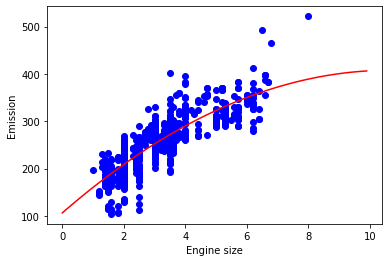

In [178]:
plt.scatter(train.Engine_Size, train.CO2_Emissions, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

---
### Evaluation

In [179]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %.2f' % r2_score(test_y_, test_y))

Mean absolute error: 23.76
Residual sum of squares (MSE): 970.46
R2-score: 0.59


Let's use a polynomial regression with degree three to try to improve the model.

Coefficients:  [[  0.         111.3343238  -18.52676551   1.38049377]]
Intercept:  [50.35011629]
Mean absolute error: 23.21
Residual sum of squares (MSE): 948.62
R2-score: 0.59


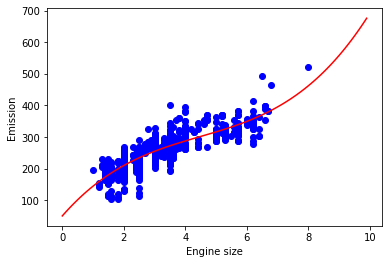

In [185]:
#modeling
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])
test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['CO2_Emissions']])
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
#plotting
plt.scatter(train.Engine_Size, train.CO2_Emissions,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
# evaluation
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y))

The cubic regression model only results in slightly better accuracy.